## this notebook covers the whole pipeline, using a single participant

In [25]:
%matplotlib inline
import os
import glob
import numpy as np
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import signal
from scipy import io
from sklearn import linear_model, datasets

In [2]:
data = sp.io.loadmat('/Users/jorge/Dropbox/research/_psd-slope/data/extClfiltCAR-mat/120127163.mat')

name  = np.squeeze(data['name'])
srate = np.squeeze(data['srate'])
data  = np.squeeze(data['data'])

Subject name:  120127163
Sampling rate: 512 Hz
Length of rec: 1060.0 sec
Data shape:    (53, 10240)
A single second of recording: 


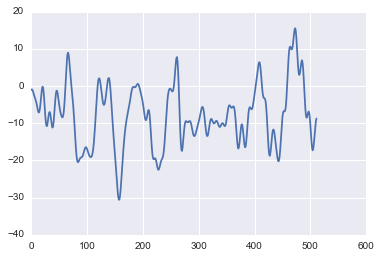

In [64]:
print("Subject name:  {}".format(name))
print("Sampling rate: {} Hz".format(srate))
print("Length of rec: {} sec".format(data.size / srate))
print("Data shape:    {}".format(data.shape))
print("A single second of recording: ")
plt.plot(data[0][512:1024])

In [65]:
subj = {}
for i in range(len(data)):
    subj[i] = {}
    
    subj[i]['f'], subj[i]['psd'] = sp.signal.welch(data[i], srate, nperseg=srate*2, noverlap=srate, window='hamming')
    
    subj[i]['f']   = subj[i]['f'].reshape((len(subj[i]['f']), 1))
    subj[i]['psd'] = subj[i]['psd'].reshape((len(subj[i]['psd']), 1))
    
    model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
    model_ransac.fit(subj[i]['f'][:50*2], np.log10(subj[i]['psd'])[:50*2])
    
    fit_line = model_ransac.predict(f)
    
    subj[i]['slope'] = model_ransac.estimator_.coef_[0][0]
    
#     plt.figure()
#     plt.xlim([1, 50])
#     plt.title(model_ransac.estimator_.coef_[0][0])
#     plt.plot(subj[i]['f'], np.log10(subj[i]['psd']))
#     plt.plot(subj[i]['f'], fit_line)

In [73]:
slopes = []
for chan in subj:
    slopes.append(subj[chan]['slope'])
np.mean(slopes)

-0.042196167519444022